## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [4]:
Xtrain.shape

(7500, 15)

In [6]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


Данные содержат информацию по 15 признакам, один из них таргетная переменная. Всего 7500 записей.
При этом есть пропущенные значения  в слудеющих признаках:
- f2 - 75 пропущенных значений, это 1% от данных, строки с пропущенными значениями можно удалить;
- f7 - 1875 пропущенных значений, это 25 от данных, эти данные нужно заполнить.
- f11 - 10 пропущенных значений, 0.1% -эти строки можно удалить.


In [13]:
Xtrain = Xtrain.dropna(subset=['f2', 'f11'])
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7415 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7415 non-null   int64  
 1   f2      7415 non-null   float64
 2   f3      7415 non-null   int64  
 3   f4      7415 non-null   float64
 4   f5      7415 non-null   int64  
 5   f6      7415 non-null   float64
 6   f7      5567 non-null   float64
 7   f8      7415 non-null   float64
 8   f9      7415 non-null   float64
 9   f10     7415 non-null   float64
 10  f11     7415 non-null   float64
 11  f12     7415 non-null   int64  
 12  f13     7415 non-null   int64  
 13  f14     7415 non-null   float64
 14  target  7415 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 926.9 KB


Таким образом, удалено 85 строк, далее изучим f7.

In [31]:
mean_dict = Xtrain.groupby(['target'])['f7'].mean().to_dict()
Xtrain.fillna(Xtrain['target'].map(mean_dict), inplace=True)
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7415 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7415 non-null   int64  
 1   f2      7415 non-null   float64
 2   f3      7415 non-null   int64  
 3   f4      7415 non-null   float64
 4   f5      7415 non-null   int64  
 5   f6      7415 non-null   float64
 6   f7      7415 non-null   float64
 7   f8      7415 non-null   float64
 8   f9      7415 non-null   float64
 9   f10     7415 non-null   float64
 10  f11     7415 non-null   float64
 11  f12     7415 non-null   int64  
 12  f13     7415 non-null   int64  
 13  f14     7415 non-null   float64
 14  target  7415 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 926.9 KB


Таким образом все пропущенные значения в признаке f7 заполнены срднеарифметическим значением признака f7 в соответствии с таргетом.

In [5]:
Xtest.shape

(2500, 15)

In [12]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


В данном части данных пропущенных щзначений нет

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

<Axes: ylabel='Xtrain_Target'>

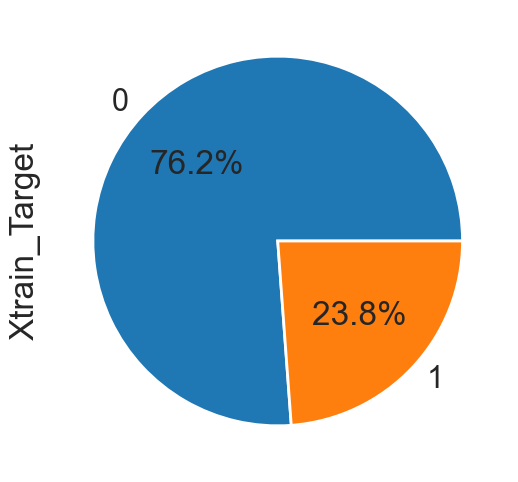

In [32]:


sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
Xtrain.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Xtrain_Target",
                                       autopct='%1.1f%%')

<Axes: ylabel='Xest_Target'>

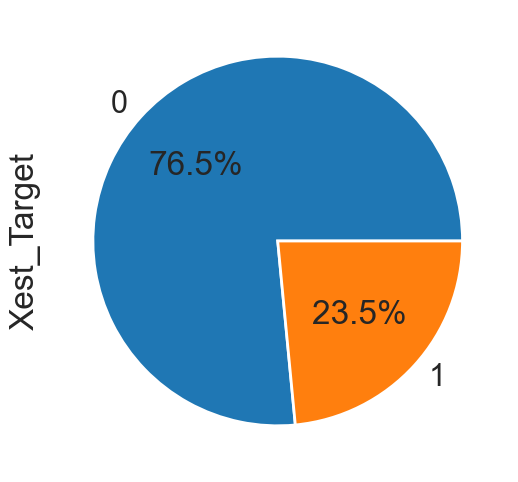

In [33]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
Xtest.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Xest_Target",
                                       autopct='%1.1f%%')

Существует дисбаланс классов, соотношение 3 к 1. Когда существует дисбаланс классов лучше использовать f1 меру.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [57]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X = Xtrain.drop('target', axis=1)
y = Xtrain['target']

# Разобьем выборку на тренировочну и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
# Ваш код здесь
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)
print('f1 train', f1_score(y_train, y_pred_train, average='binary'))
print('f1 test', f1_score(y_test, y_pred_test, average='binary'))

f1 train 0.3878724516466283
f1 test 0.41140529531568226


C:\Users\Dell 5531\PycharmProjects\GB_Python_for_DS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


В бэйслайне логистической регрессии модель не сошлась.

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)
print('SVC f1 train', f1_score(y_train, y_pred_train_svc, average='binary'))
print('SVC f1 test', f1_score(y_test, y_pred_test_svc, average='binary'))

SVC f1 train 0.08254397834912043
SVC f1 test 0.10160427807486631


Качество базовой модели опорных векторов очень низкое

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [60]:
# Ваш код здесь
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

lg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lg.fit(X_train_scale, y_train)
y_pred_scale = lg.predict(X_train_scale)
y_pred_test_scale = lg.predict(X_test_scale)
print('f1 train', f1_score(y_train, y_pred_scale, average='binary'))
print('f1 test', f1_score(y_test, y_pred_test_scale, average='binary'))

f1 train 0.6869145614533069
f1 test 0.6682134570765661


In [61]:
svc = SVC()
svc.fit(X_train_scale, y_train)
y_pred_train_svc = svc.predict(X_train_scale)
y_pred_test_svc = svc.predict(X_test_scale)
print('SVC f1 train', f1_score(y_train, y_pred_train_svc, average='binary'))
print('SVC f1 test', f1_score(y_test, y_pred_test_svc, average='binary'))

SVC f1 train 0.7180085569817192
SVC f1 test 0.6573643410852713


In [62]:
from sklearn.feature_selection import RFE
# Создаем RFE модель и выбираем 10 признаков
rfe = RFE(estimator=lg, n_features_to_select=6)
rfe = rfe.fit(X, y)

# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns, 
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))

   Feature  Ranking
2       f3        9
1       f2        8
10     f11        7
11     f12        6
8       f9        5
12     f13        4
0       f1        3
4       f5        2
5       f6        1
3       f4        1
9      f10        1
7       f8        1
6       f7        1
13     f14        1


In [63]:
top_features = selected_features.sort_values(by='Ranking', ascending=False)[:8]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train_selected)
X_test_scale = scale.fit_transform(X_test_selected)

# Обучение логистической регрессии
dt = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
dt.fit(X_train_scale, y_train)
print(f'f1 train {f1_score(y_train, dt.predict(X_train_scale))}')
print(f'f1 test {f1_score(y_test, dt.predict(X_test_scale))}')

f1 train 0.5753346624893193
f1 test 0.5688073394495413


Стандартизация данных позволила улучшить качество, как модели логистической регрессии, так и модели опорных векторов. Отбор 8 признаков методом RFE не позволил улучшить качество модели.

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(f_classif, k=8).fit(X, y)

# Получаем оценки признаков
scores = k_best.scores_

# Создаем DataFrame для выбранных признаков и их оценок
selected_features3 = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
})

# Сортируем по убыванию оценок
print(selected_features3.sort_values(by='Score', ascending=False))

   Feature        Score
7       f8  1900.491524
5       f6  1823.959956
6       f7  1303.956393
3       f4  1070.749226
4       f5   823.552039
0       f1   419.929364
12     f13   396.470298
10     f11   363.296710
9      f10   326.467155
1       f2   244.577530
11     f12   202.031301
8       f9    79.017878
13     f14    71.240301
2       f3     4.865626


In [89]:
top_features = selected_features3.sort_values(by='Score', ascending=False)[:11]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train_selected)
X_test_scale = scale.fit_transform(X_test_selected)

# Обучение логистическй регрессии
lg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lg.fit(X_train_scale, y_train)
print(f'f1 train {f1_score(y_train, lg.predict(X_train_scale))}')
print(f'f1 test {f1_score(y_test, lg.predict(X_test_scale))}')

f1 train 0.6878727634194831
f1 test 0.6744457409568262


In [91]:
top_features = selected_features3.sort_values(by='Score', ascending=False)[:11]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train_selected)
X_test_scale = scale.fit_transform(X_test_selected)

# Обучение модели методом опорных векторов
svc_top = SVC(class_weight='balanced', random_state=42)
svc_top.fit(X_train_scale, y_train)
print(f'f1 train {f1_score(y_train, svc_top.predict(X_train_scale))}')
print(f'f1 test {f1_score(y_test, svc_top.predict(X_test_scale))}')

f1 train 0.7103274559193955
f1 test 0.6912751677852349


Отбор 11 признаков позволил улучшить качество модели логистической регрессии на тестовой выборке с 0.668 до 0.674, и качество модели опорных векторов с 0.657 до 0.691 на тестовой выборке

In [77]:
for c in [0.01, 0.1, 1, 10, 100]:
    lg = LogisticRegression(C=c, solver='liblinear', class_weight='balanced', random_state=42)
    lg.fit(X_train_scale, y_train) 
    y_pred = lg.predict(X_test_scale)
    print('C=',c, end='\t')
    print('f1', round(f1_score(y_test, y_pred, average='binary'),3))

C= 0.01	f1 0.659
C= 0.1	f1 0.669
C= 1	f1 0.674
C= 10	f1 0.675
C= 100	f1 0.675


In [80]:
for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    lg = LogisticRegression(solver=solver, class_weight='balanced', random_state=42)
    lg.fit(X_train_scale, y_train) 
    y_pred = lg.predict(X_test_scale)
    print('solver=',solver, end='\t\t\t')
    print('f1', round(f1_score(y_test, y_pred, average='binary'),3))


solver= lbfgs			f1 0.675
solver= liblinear			f1 0.674
solver= newton-cg			f1 0.675
solver= newton-cholesky			f1 0.675
solver= sag			f1 0.675
solver= saga			f1 0.675


Подбор разных солверов и подор параметра  С в модели логистической регрессии не позволили улучшить результат модели.

In [83]:
for c in [0.01, 0.1, 1, 10, 100]:
    svc = SVC(C=c, class_weight='balanced', random_state=42)
    svc.fit(X_train_scale, y_train) 
    y_pred = svc.predict(X_test_scale)
    print('C=',c, end='\t')
    print('f1', round(f1_score(y_test, y_pred, average='binary'),3))

C= 0.01	f1 0.599
C= 0.1	f1 0.66
C= 1	f1 0.691
C= 10	f1 0.691
C= 100	f1 0.691


In [86]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(class_weight='balanced', random_state=42, kernel=kernel)
    svc.fit(X_train_scale, y_train) 
    y_pred = svc.predict(X_test_scale)
    print('kernel=',kernel, end='\t\t\t')
    print('f1', round(f1_score(y_test, y_pred, average='binary'),3))

kernel= linear			f1 0.654
kernel= poly			f1 0.672
kernel= rbf			f1 0.691
kernel= sigmoid			f1 0.575


Модель ядра по умолчанию rbf, в данном случае опказало наилучший результат.

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [95]:
# Ваш код здесь
X = Xtest.drop(columns=['target'], axis=1)
y = Xtest.target
X_test_selected = X[top_features.Feature]
scale = StandardScaler()
X_scale = scale.fit_transform(X_test_selected)
print(f'f1 test {f1_score(y, svc.predict(X_scale))}')

f1 test 0.5588235294117647


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [105]:
# Ваш код здесь
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        pred_final = svc_top.predict(X_scale) * alpha + lg.predict(X_scale) * (1 - alpha)
        pred = (pred_final > threshold).astype(int)
        print(f'{alpha=} {threshold=}, f1= {f1_score(y, pred):.3f}')

alpha=0.1 threshold=0.1, f1= 0.520
alpha=0.1 threshold=0.2, f1= 0.520
alpha=0.1 threshold=0.3, f1= 0.520
alpha=0.1 threshold=0.4, f1= 0.520
alpha=0.1 threshold=0.5, f1= 0.520
alpha=0.1 threshold=0.6, f1= 0.520
alpha=0.1 threshold=0.7, f1= 0.520
alpha=0.1 threshold=0.8, f1= 0.520
alpha=0.1 threshold=0.9, f1= 0.501
alpha=0.2 threshold=0.1, f1= 0.572
alpha=0.2 threshold=0.2, f1= 0.520
alpha=0.2 threshold=0.3, f1= 0.520
alpha=0.2 threshold=0.4, f1= 0.520
alpha=0.2 threshold=0.5, f1= 0.520
alpha=0.2 threshold=0.6, f1= 0.520
alpha=0.2 threshold=0.7, f1= 0.520
alpha=0.2 threshold=0.8, f1= 0.501
alpha=0.2 threshold=0.9, f1= 0.501
alpha=0.3 threshold=0.1, f1= 0.572
alpha=0.3 threshold=0.2, f1= 0.572
alpha=0.3 threshold=0.3, f1= 0.520
alpha=0.3 threshold=0.4, f1= 0.520
alpha=0.3 threshold=0.5, f1= 0.520
alpha=0.3 threshold=0.6, f1= 0.520
alpha=0.3 threshold=0.7, f1= 0.501
alpha=0.3 threshold=0.8, f1= 0.501
alpha=0.3 threshold=0.9, f1= 0.501
alpha=0.4 threshold=0.1, f1= 0.572
alpha=0.4 threshold=

Наилучшее качество на отложенной выборке получилось 0.572 при threshold < 0.3 и alpha < 0.7

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

Для улучшение baseline-модели были сделаны следующие шаги:
- стандартизация данных;
- применена стратификация данных;
- для модели логистической регрессии применен применена балансировка данных по классам;
- произведен отбор признаков, методами RFE и SelectKBest

Отбор 11 признаков позволил улучшить качество модели логистической регрессии на тестовой выборке до 0.674, и качество модели опорных векторов до 0.691 на тестовой выборке

На отложенной выборке удалось достичь качества = 0.572. Модель не дообучилась.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.